# Импорт

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [101]:
models = pd.read_csv('../Data/DataLaba2/neo_task_smoted.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.5, random_state=42)


In [102]:
models.describe()


,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
count,163992.000000,163992.000000,163992.000000,163992.000000,163992.000000
mean,-0.989587,-0.540983,0.024955,0.074678,0.500000
std,0.015573,0.227387,0.584422,0.234184,0.500002
min,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-0.997909,-0.712718,-0.485564,-0.082243,0.000000
50%,-0.992936,-0.575117,0.051370,0.023780,0.500000
75%,-0.987381,-0.409016,0.536592,0.240718,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Создание модели

In [103]:
model_class = tf.keras.models.Sequential()
model_class.add(tf.keras.layers.Dense(X_train.shape[1],
                                      activation='sigmoid',
                                      input_shape=(X_train.shape[1],), 
                                      name='input',
                                      # kernel_regularizer=tf.keras.regularizers.L2(l2=1),
                                      #   kernel_constraint=tf.keras.constraints.max_norm(1000.),
                                      # bias_initializer=tf.keras.initializers.HeNormal,
                                      use_bias=True
                                      ))
model_class.add(tf.keras.layers.Dense(X_train.shape[1]*2,
                                      activation='sigmoid',
                                      name='hidden_layer_2',
                                      # kernel_regularizer=tf.keras.regularizers.L2(l2=1),
                                      #   kernel_constraint=tf.keras.constraints.max_norm(1000.),
                                      # bias_initializer=tf.keras.initializers.HeNormal,
                                      use_bias=True
                                      ))
model_class.add(tf.keras.layers.Dense(X_train.shape[1],
                                      activation='sigmoid',
                                      name='hidden_layer_3',
                                      # kernel_regularizer=tf.keras.regularizers.L2(l2=1),
                                      #   kernel_constraint=tf.keras.constraints.max_norm(1000.),
                                      # bias_initializer=tf.keras.initializers.HeNormal,
                                      use_bias=True
                                      ))
model_class.add(tf.keras.layers.Dense(1,
                                      name='output', 
                                      activation='sigmoid',
                                      # kernel_regularizer=tf.keras.regularizers.L2(l2=1), 
                                    #   kernel_constraint=tf.keras.constraints.max_norm(1000.),
                                      # bias_initializer=tf.keras.initializers.HeNormal,
                                      use_bias=True
                                      ))
model_class.summary()
model_coder = model_class


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 4)                 20        
                                                                 
 hidden_layer_2 (Dense)      (None, 8)                 40        
                                                                 
 hidden_layer_3 (Dense)      (None, 4)                 36        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [104]:
# model_coder = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(3, input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(1,)
# ])


## Компиляция

In [105]:
model_coder.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['binary_crossentropy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.Recall()]
)


# Обучение

In [106]:
model_coder.fit(
    X_train.to_numpy(),
    y_train.to_numpy(),
    validation_split=0.5,
    epochs=10,
    batch_size=10
)


Epoch 1/10
4100/4100 [==============================] - 10s 2ms/step - loss: 0.2002 - binary_crossentropy: 0.5845 - false_negatives_8: 5031.0000 - recall_9: 0.7541 - val_loss: 0.1228 - val_binary_crossentropy: 0.4019 - val_false_negatives_8: 444.0000 - val_recall_9: 0.9783
Epoch 2/10
4100/4100 [==============================] - 9s 2ms/step - loss: 0.1144 - binary_crossentropy: 0.3701 - false_negatives_8: 466.0000 - recall_9: 0.9772 - val_loss: 0.1128 - val_binary_crossentropy: 0.3605 - val_false_negatives_8: 384.0000 - val_recall_9: 0.9813
Epoch 3/10
4100/4100 [==============================] - 9s 2ms/step - loss: 0.1098 - binary_crossentropy: 0.3509 - false_negatives_8: 350.0000 - recall_9: 0.9829 - val_loss: 0.1100 - val_binary_crossentropy: 0.3512 - val_false_negatives_8: 295.0000 - val_recall_9: 0.9856
Epoch 4/10
4100/4100 [==============================] - 9s 2ms/step - loss: 0.1078 - binary_crossentropy: 0.3451 - false_negatives_8: 312.0000 - recall_9: 0.9847 - val_loss: 0.1090 -

# Predict

In [107]:
y_predicted = model_coder.predict(X_test).T[0]


2563/2563 [==============================] - 3s 1ms/step


In [108]:
np.unique(y_predicted)


array([0.00127466, 0.00127466, 0.00127466, ..., 0.8101582 , 0.81015825,
       0.81015855], dtype=float32)

# Оценка качества 

In [120]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted>0.5))


Accuracy
0.8687009122396214


In [121]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted > 0.5))


Confusion matrix
[[30873 10086]
 [  680 40357]]


In [122]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted > 0.5))


Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.98      0.75      0.85     40959
         1.0       0.80      0.98      0.88     41037

    accuracy                           0.87     81996
   macro avg       0.89      0.87      0.87     81996
weighted avg       0.89      0.87      0.87     81996



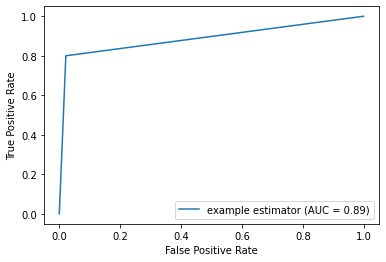

In [123]:
fpr, tpr, thresholds = roc_curve(y_predicted > 0.5, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()